In [36]:
from Data_Preprocess import Data_Preprocess
from sklearn.model_selection import train_test_split
import numpy as np
from Metrics import Metrics

In [37]:
url = 'mushroom.txt'
column_names_csv = 'mushroom_feature_names.csv'
preprocessing = Data_Preprocess(url, column_names_csv)
preprocessing.load_dataset()
nan_counts = preprocessing.drop_columns_with_high_nan(threshold=2000)
preprocessing.encode_categorical_features()
encoded_data_types = preprocessing.display_data_types()
dataset = preprocessing.dataset

# Q4.1.1

In [38]:
X = dataset.drop(columns=['class'])
y = dataset['class']

In [39]:
variances = np.var(X, axis=0)
low_variance_features = list(np.where(variances < 0.01)[0])
# X_filtered = np.delete(X, low_variance_features, axis=1)
X_filtered = X.drop(X.columns[list(low_variance_features)], axis=1)

# Q.4.1.2

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered.values, y, test_size=0.2, random_state=42)

# Q4.1.3

what is the difference between Naive Bayes classifier and LDA?

Naive Bayes (NB) classifier and Generalized Linear Discriminant Analysis (GLDA) are both machine learning algorithms used for classification tasks, but they have different underlying assumptions and approaches.

1. Assumptions:
        Naive Bayes: It is based on the Bayes' theorem and assumes that features are conditionally independent given the class label.
        GLDA: Generalized Linear Discriminant Analysis is an extension of Linear Discriminant Analysis (LDA) and assumes that the data come from a mixture of several multivariate normal distributions, each with its own set of parameters.

2. Handling Continuous vs. Categorical Features:
    Naive Bayes: Typically used for categorical features. It's well-suited for text classification tasks, where features might represent the presence or absence of words.
    GLDA: Can handle both continuous and categorical features. It is particularly suitable for problems where the data is continuous and follows a multivariate normal distribution.

3. Decision Boundary:
    Naive Bayes: Employs a probabilistic model based on Bayes' theorem and calculates the probability of each class given the input features. The decision boundary is linear.
    GDA: Defines decision boundaries that are quadratic or higher-order, allowing for more complex relationships between features.

4. Training Data Requirements:
    Naive Bayes: Requires a relatively small amount of training data to estimate the parameters needed for classification.
    GLDA: May require more data, especially if the underlying assumptions of multivariate normality hold strictly.

5. Use Cases:
    Naive Bayes: Often used in natural language processing tasks like spam filtering and document classification.
    GLDA: Suitable for more general classification tasks where the data distribution can be reasonably assumed to be multivariate normal.

# Q4.1.4

What are the model parameters of a Naive Bayes classifier? What is the role of each parameter?
Between Naive Bayes, QDA, and LDA, which one has potentially more parameters? why?

In the context of Naive Bayes classifiers, the model parameters depend on the specific variant of Naive Bayes being used.

1. Gaussian Naive Bayes:

    Parameters:
        Class Priors (P(Y)): The probability of each class occurring in the dataset. These are estimated from the training data.
        Class-Conditional Means (μ): The mean of each feature for each class.
        Class-Conditional Variances (σ2): The variance of each feature for each class.

2. Multinomial Naive Bayes:

    Parameters:
        Class Priors (P(Y)): Similar to Gaussian Naive Bayes, the probability of each class occurring.
        Class-Conditional Probabilities (P(Xi∣Y)): The probability of each feature (word) occurring given the class.

3. Bernoulli Naive Bayes:

    Parameters:
        Class Priors (P(Y)): Similar to other Naive Bayes variants.
        Class-Conditional Probabilities (P(Xi∣Y)): The probability of each feature (binary) occurring given the class.

Role of Each Parameter:

    Class Priors (P(Y)): Represents the likelihood of each class in the dataset. It influences the overall prediction and is crucial for handling imbalanced datasets.
    Class-Conditional Parameters (μ,σ2,P(Xi∣Y))): Describe the distribution of features given the class. These parameters help calculate the likelihood of observing specific feature values given the class.

Comparison with QDA and LDA:

    Quadratic Discriminant Analysis (QDA):
        Parameters: QDA typically estimates the class priors, class-specific means, and class-specific covariance matrices.
        More Parameters: QDA has potentially more parameters because it estimates covariance matrices for each class separately.

    Linear Discriminant Analysis (LDA):
        Parameters: LDA estimates the class priors, shared covariance matrix, and class-specific means.
        Fewer Parameters: LDA generally has fewer parameters than QDA because it assumes a shared covariance matrix across classes.

In summary, among Naive Bayes, QDA, and LDA:

    More Parameters: QDA potentially has more parameters due to estimating separate covariance matrices for each class.
    Fewer Parameters: LDA has fewer parameters compared to QDA because it assumes a shared covariance matrix.
    Naive Bayes: The number of parameters depends on the specific variant (Gaussian, Multinomial, Bernoulli) and the number of features.

# Q4.1.5

In [56]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.variances[c] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / X.shape[0]
    
    def calculate_likelihood(self, x, mean, var):
        exponent = np.exp(-(x - mean)**2 / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict_instance(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            epsilon = 1e-10
            likelihood = np.sum(np.log(self.calculate_likelihood(x, self.means[c], self.variances[c]) + epsilon))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return [self.predict_instance(x) for x in X]

In [57]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

In [58]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [59]:
metrics_test = Metrics(y_test)
metrics_train = Metrics(y_train)

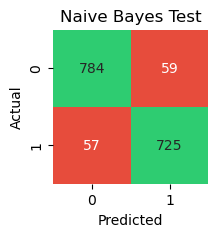

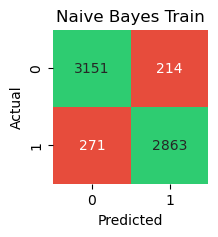

In [60]:
metrics_test.display_confusion_matrix(y_pred_test,"Naive Bayes Test")
metrics_train.display_confusion_matrix(y_pred_train,"Naive Bayes Train")

In [61]:
misclassified_test = metrics_test.misclassified_samples(y_pred_test)
print("misclassified test samples by: ", misclassified_test)
misclassified_train = metrics_train.misclassified_samples(y_pred_train)
print("misclassified Train samples by: ", misclassified_train)

misclassified test samples by:  116
misclassified Train samples by:  485


In [62]:
accuarcy_test = metrics_test.accuracy(y_pred_test)
print("Accuracy Test samples by: ", accuarcy_test)
accuarcy_train = metrics_train.accuracy(y_pred_train)
print("Accuracy Train samples by: ", accuarcy_train)

Accuracy Test samples by:  0.9286153846153846
Accuracy Train samples by:  0.9253731343283582
